In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
import statsmodels  as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from typing import Literal
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.multicomp as multi
import seaborn as sns
import statsmodels as sm
from statsmodels.stats.anova import anova_lm

In [3]:
df=pd.read_excel('Time Series.xlsx')
pd.set_option('display.max_rows',None)
print(df)

PermissionError: [Errno 13] Permission denied: 'Time Series.xlsx'

In [ ]:
df

# **Data Visualization**

**1.Scatter plot**

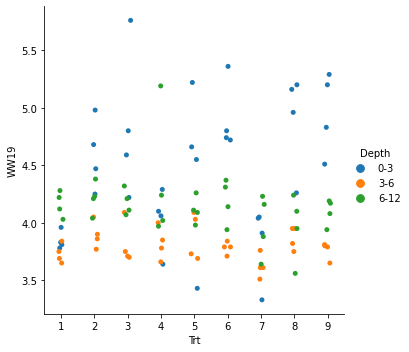

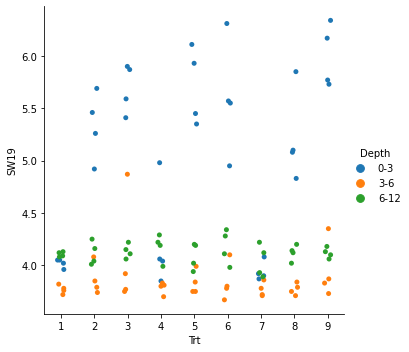

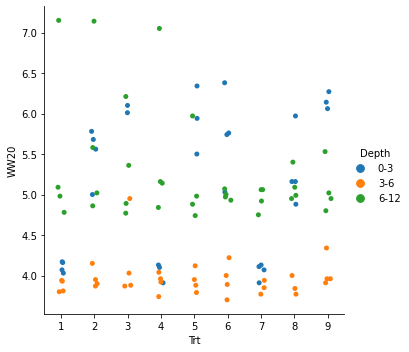

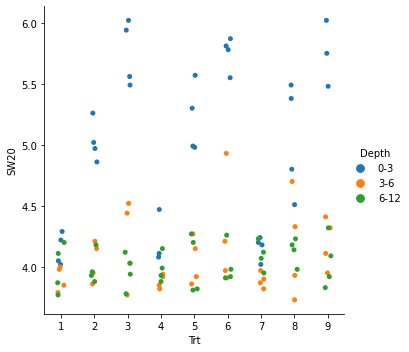

In [6]:

f1=sns.catplot(x='Trt',y='WW19',hue='Depth',data=df)
f2=sns.catplot(x='Trt',y='SW19',hue='Depth',data=df)
f3=sns.catplot(x='Trt',y='WW20',hue='Depth',data=df)
f4=sns.catplot(x='Trt',y='SW20',hue='Depth',data=df)
plt.show()

How our PH value are distributed as time series. 

**Box Plot**

NameError: name 'df' is not defined

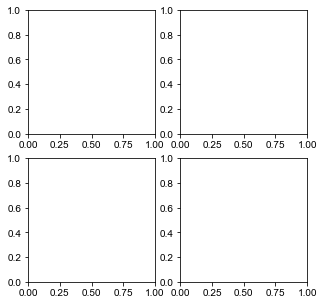

In [4]:
sns.set_palette('tab10')  
f , axes = plt.subplots(nrows=2, ncols=2, figsize = (5,5))
sns.set_style("darkgrid")
f1=sns.boxplot(x='Trt',y='WW19',hue='Depth',data=df, ax=axes[0,0])
f2=sns.boxplot(x='Trt',y='SW19',hue='Depth',data=df,ax=axes[0,1])
f3=sns.boxplot(x='Trt',y='WW20',hue='Depth',data=df,ax=axes[1,0])
f4=sns.boxplot(x='Trt',y='SW20',hue='Depth',data=df,ax=axes[1,1])
plt.show()

Box plot visualize how the mean distribution is distributed.

**MANOVA TABLE**

In [8]:
maov = MANOVA.from_formula('WW19 + SW19 + WW20 + SW20 ~ Depth + Trt + Trt:Depth',data = df)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0723 4.0000 91.0000 291.9760 0.0000
         Pillai's trace  0.9277 4.0000 91.0000 291.9760 0.0000
 Hotelling-Lawley trace 12.8341 4.0000 91.0000 291.9760 0.0000
    Roy's greatest root 12.8341 4.0000 91.0000 291.9760 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          Depth          Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.4730 8.0000 182.0000 10.3281 0.0000
          Pillai's trace 0.5760 8.0000 184.0000  9.3040 0.0000
  Hotelling

The different names given to each row (namely, Pillai's Trace, Wilks' Lambda, Hotelling's Trace and Roy's Largest Root) are the names of the different multivariate test statistics that can be used to test the statistical significance of the different effects of the independent variables. The most commonly recommended multivariate statistic to use is Wilks' Lambda (Λ).

**From box plot also we can see the different**

DEPTH:
We can see that p = .000 (i.e., the Wilks' Lambda in Depth) Indicates that Depth significantly affects the combined DV (WW19,SW19,WW20 and SW20). This means that the effect of the PH Depth on the dependent variables is not the same. I.E There is at least one mean vector different between the depth.(Which one can be done throw univariate analysis).

Treatment:

In treatment pvalue is 0.0039,indicates that Treatment significantly affects the combined DV .We can say there is significant different in means vector of each level of treatment.

Interaction:

In above table interaction term is significant, the effects of Treatment are different at each level of the other factor(Depth) across all DV in our model.



 **PROFIL PLOT**

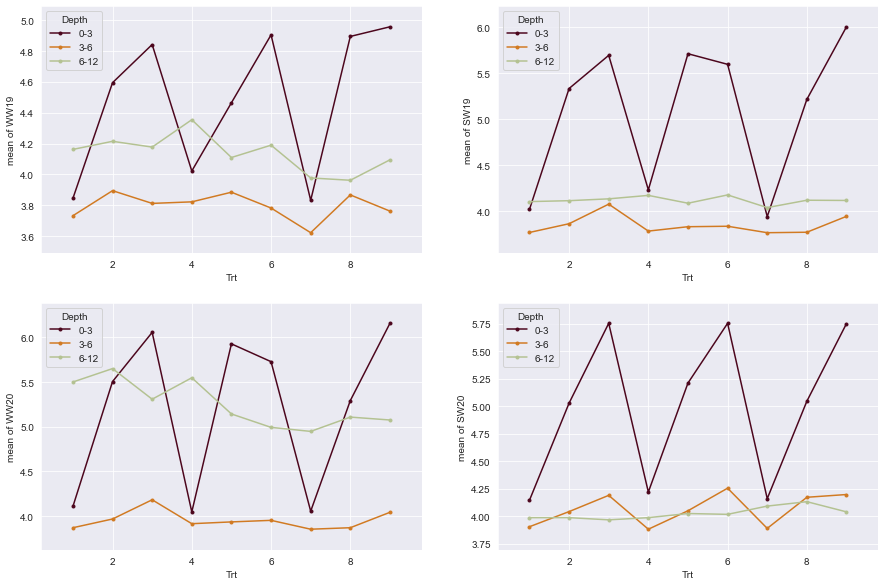

In [9]:
f , axes = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
sns.set_style("darkgrid")
fig1 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['WW19'], ax=axes[0,0],colors=['#4c061d','#d17a22', '#b4c292'])
fig2 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['SW19'],ax=axes[0,1], colors=['#4c061d','#d17a22', '#b4c292'])
fig3 = interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['WW20'],ax=axes[1,0], colors=['#4c061d','#d17a22', '#b4c292'])
fig4= interaction_plot(x=df['Trt'], trace=df['Depth'], response=df['SW20'], ax=axes[1,1],colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

The interaction plot helps to visualize the means of the response of the two factors (Treatment and Depth) on one graph. 
The X-axis have a factor of Treatment  with ,1,2,3,4,5,6,7,8,9 levels.

1.This profil plot above just shows 27 mean value of Ph Depth. 

2. Intresting, it also shows how treatment and Ph Depth affect the mean. The interaction effect means the effect of one factor depend upon other factor, which is shown by profil plot not running parallel.

3. Treatment affect Ph Depth 0-3 diffrently than ph depth 3-6 and ph depth 6-12.

4. Roughly, we see brown lines goes up and down.Since, Treatment varies with Depth 0-3. Also green line and orange line are straight.So, Treatment have almost same effect in Ph depth 3-6 and 6-12. 


Parallel lines: No interaction occurs.
Nonparallel lines: An interaction occurs. The more nonparallel the lines are, the greater the strength of the interaction.


*For a more reliable conclusion of the interaction plot,  we will analysis Post hoc test separately*

We can prove the manova table result from the profil plot.

# Univariate analysis of Each Dependent variable of Time Series.

**First Table is for WW19**

**Second Table FOr SW19**

**Third Table For WW2020**

**Fourth table for SW20**

  
  
  

In [11]:
 formula = 'WW19 ~  Trt +Depth+ Trt:Depth'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print('ANOVA TABLE FOR WINTER WHEAT 2019' )
print(aov_table.round(4))
print('/n')
formula = 'SW19 ~  Trt +Depth+ Trt:Depth'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print('ANOVA TABLE FOR SPRING WHEAT 2019')
print(aov_table.round(4))
print('/n')
formula = 'WW20 ~  Trt +Depth+ Trt:Depth'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=2)
print('ANOVA TABLE FOR 2019 Winter WHEAT 2020')
print(aov_table.round(4))

print('/n')
formula = 'SW20 ~  Trt +Depth+ Trt:Depth'
model = ols(formula,df).fit()
aov_table = anova_lm(model,typ=3)
print('ANOVA TABLE FOR 2019 Spring WHEAT 2020')
print(aov_table.round(4))

ANOVA TABLE FOR WINTER WHEAT 2019
            sum_sq     df        F  PR(>F)
Depth       8.4805    2.0  31.6079  0.0000
Trt         0.1113    1.0   0.8293  0.3646
Trt:Depth   1.2506    2.0   4.6611  0.0116
Residual   13.6835  102.0      NaN     NaN
/n
ANOVA TABLE FOR SPRING WHEAT 2019
            sum_sq     df        F  PR(>F)
Depth      30.2288    2.0  64.2865  0.0000
Trt         0.5951    1.0   2.5313  0.1147
Trt:Depth   1.3801    2.0   2.9351  0.0576
Residual   23.9813  102.0      NaN     NaN
/n
ANOVA TABLE FOR 2019 Winter WHEAT 2020
            sum_sq    df        F  PR(>F)
Depth      34.8209   2.0  44.8459  0.0000
Trt         0.0006   1.0   0.0016  0.9686
Trt:Depth   3.1745   2.0   4.0884  0.0198
Residual   36.8817  95.0      NaN     NaN
/n
ANOVA TABLE FOR 2019 Spring WHEAT 2020
             sum_sq     df         F  PR(>F)
Intercept  158.0708    1.0  888.7601  0.0000
Depth        2.5046    2.0    7.0410  0.0014
Trt          1.0821    1.0    6.0840  0.0153
Trt:Depth    0.3995    2.

**Dependent Variable WW19.**



DEPTH: We reject Null Hypothesis.
From table we conclude that there is stastically significant different between the mean value of depth. I.E mean Ph value varies with respect to depth.

Treatment:We null Hypothesis
we see that p value of treatment is 0.3646. I.E mean value of each treatment level are same.

Interaction effect.
Interaction effect is significant between the Dependent variable.Because the interaction effect between Treatment and Depth is statistically significant, we cannot interpret the main effects without considering the interaction effect. Lets analysis interaction effect through profil plot.
(Describe from above profil plot)

**Dependent Variable SW19.**

DEPTH: We reject Null Hypothesis.
From table we conclude that there is stastically significant different between the mean value of depth. I.E mean Ph value varies with respect to depth.

Treatment:We null Hypothesis
we see that p value of treatment is 0.1147. I.E mean value of each treatment level are same.

Interaction effect.
Interaction effect is not significant between the Dependent variable. we can interpret the main effects of Depth. From Graph aslo we can see there is no cross between the graph. Lets analysis interaction effect through profil plot.
(Describe from above profil plot)

**Dependent Variable WW20.**

DEpth: Stastically significant.


Treatment: Mean between different level of treatment are equal.


Intreaction:Interaction effect is significant between the Dependent variable.Because the interaction effect between Treatment and Depth is statistically significant, we cannot interpret the main effects without considering the interaction effect. Lets analysis interaction effect through profil plot.

**Dependent Variable SW20**.

Depth:
There is at least one significant different between mean of Depth.

Treatment:
There is at least one significant different between mean of different treatment.

Interaction Efffect: No interaction effect.


# Multiple pairwise comparisons (Post-hoc test)

# **1.Dependent Variable WW19.**

**Post-Hoc Comparisons, Depth**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0-3    3-6  -0.6864    0.0 -0.8985 -0.4743   True
   0-3   6-12  -0.3461 0.0005 -0.5582  -0.134   True
   3-6   6-12   0.3403 0.0007  0.1282  0.5524   True
----------------------------------------------------


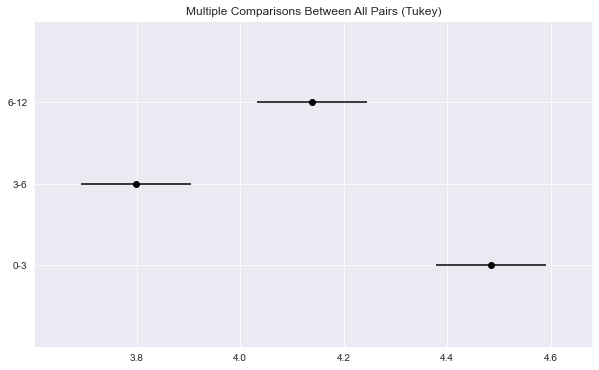

In [12]:
 tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW19'],
 groups=df['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary()) 

**Post-Hoc Comparisons, Treatment**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.3217 0.7283 -0.2689 0.9122  False
     1      3   0.3642 0.5774 -0.2264 0.9547  False
     1      4   0.1533 0.9959 -0.4372 0.7439  False
     1      5     0.24 0.9324 -0.3506 0.8306  False
     1      6   0.3792 0.5224 -0.2114 0.9697  False
     1      7  -0.1025 0.9998 -0.6931 0.4881  False
     1      8   0.3283 0.7058 -0.2622 0.9189  False
     1      9   0.3583 0.5988 -0.2322 0.9489  False
     2      3   0.0425    1.0 -0.5481 0.6331  False
     2      4  -0.1683 0.9923 -0.7589 0.4222  False
     2      5  -0.0817    1.0 -0.6722 0.5089  False
     2      6   0.0575    1.0 -0.5331 0.6481  False
     2      7  -0.4242 0.3655 -1.0147 0.1664  False
     2      8   0.0067    1.0 -0.5839 0.5972  False
     2      9   0.0367    1.0 -0.5539 0.6272  False
     3      4  -0.2108 0.9678 -0.8014 0.3797  False
     3      

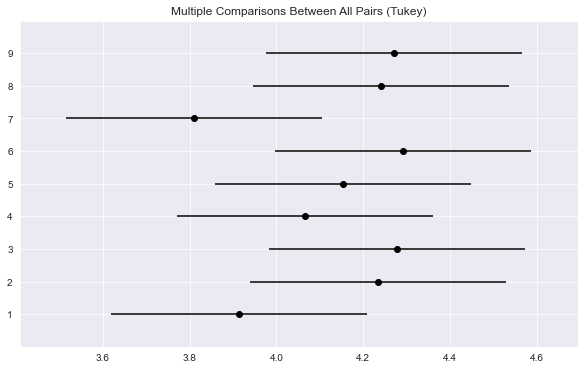

In [13]:
 tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW19'],
 groups=df['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())  

**Post-Hoc Comparisons, Interaction**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 1_0-3  1_3-6  -0.1125    1.0 -0.9262  0.7012  False
 1_0-3 1_6-12   0.3175 0.9991 -0.4962  1.1312  False
 1_0-3  2_0-3     0.75 0.1135 -0.0637  1.5637  False
 1_0-3  2_3-6     0.05    1.0 -0.7637  0.8637  False
 1_0-3 2_6-12     0.37 0.9917 -0.4437  1.1837  False
 1_0-3  3_0-3   0.9975 0.0029  0.1838  1.8112   True
 1_0-3  3_3-6  -0.0325    1.0 -0.8462  0.7812  False
 1_0-3 3_6-12   0.3325 0.9981 -0.4812  1.1462  False
 1_0-3  4_0-3   0.1775    1.0 -0.6362  0.9912  False
 1_0-3  4_3-6  -0.0225    1.0 -0.8362  0.7912  False
 1_0-3 4_6-12     0.51 0.7894 -0.3037  1.3237  False
 1_0-3  5_0-3     0.62 0.4194 -0.1937  1.4337  False
 1_0-3  5_3-6     0.04    1.0 -0.7737  0.8537  False
 1_0-3 5_6-12    0.265    1.0 -0.5487  1.0787  False
 1_0-3  6_0-3     1.06  0.001  0.2463  1.8737   True
 1_0-3  6_3-6  -0.0625    1.0 -0.8762  0.7512 

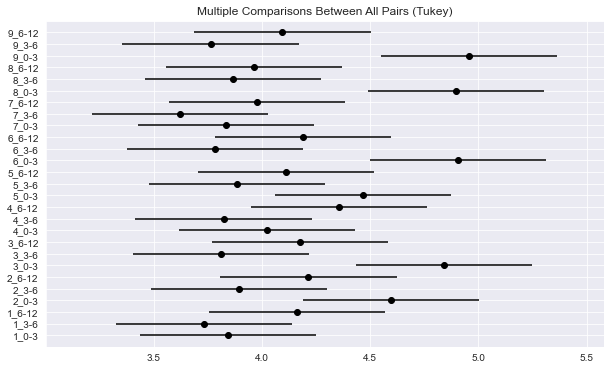

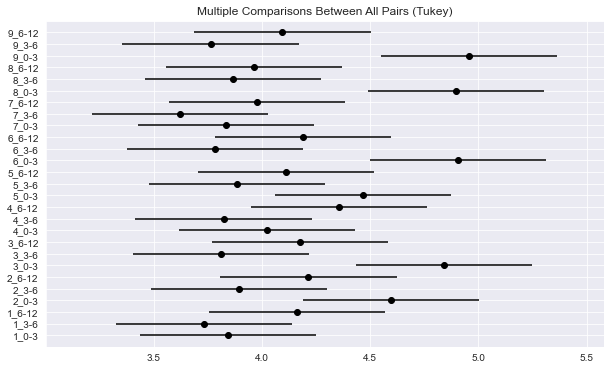

In [14]:
 df["combine"] = df["Trt"].astype(str)+'_' + df["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW19'],
 groups=df['combine'],
 alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# 2.Dependent Variable SW19

**Post-Hoc Comparisons, Depth**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0-3    3-6  -1.2322    0.0 -1.5108 -0.9536   True
   0-3   6-12  -0.9636    0.0 -1.2422  -0.685   True
   3-6   6-12   0.2686 0.0613   -0.01  0.5472  False
----------------------------------------------------


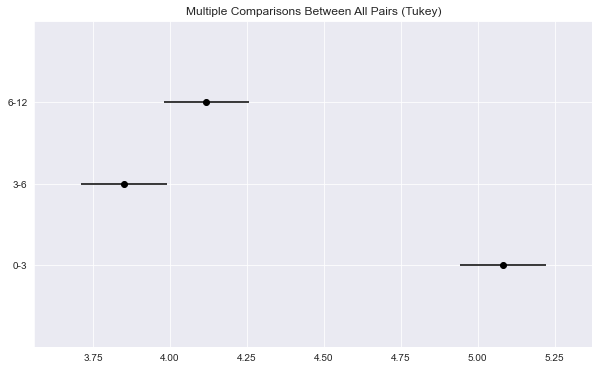

In [15]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['SW19'],
 groups=df['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Post-Hoc Comparisons, Treatment**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.3217 0.7283 -0.2689 0.9122  False
     1      3   0.3642 0.5774 -0.2264 0.9547  False
     1      4   0.1533 0.9959 -0.4372 0.7439  False
     1      5     0.24 0.9324 -0.3506 0.8306  False
     1      6   0.3792 0.5224 -0.2114 0.9697  False
     1      7  -0.1025 0.9998 -0.6931 0.4881  False
     1      8   0.3283 0.7058 -0.2622 0.9189  False
     1      9   0.3583 0.5988 -0.2322 0.9489  False
     2      3   0.0425    1.0 -0.5481 0.6331  False
     2      4  -0.1683 0.9923 -0.7589 0.4222  False
     2      5  -0.0817    1.0 -0.6722 0.5089  False
     2      6   0.0575    1.0 -0.5331 0.6481  False
     2      7  -0.4242 0.3655 -1.0147 0.1664  False
     2      8   0.0067    1.0 -0.5839 0.5972  False
     2      9   0.0367    1.0 -0.5539 0.6272  False
     3      4  -0.2108 0.9678 -0.8014 0.3797  False
     3      

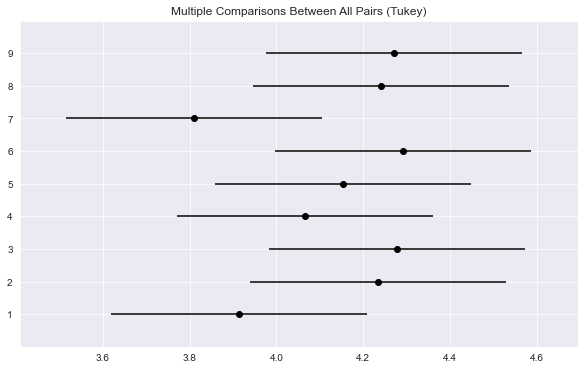

In [16]:
 tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW19'],
 groups=df['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())  

**Post-Hoc Comparisons, Interaction**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 1_0-3  1_3-6    -0.25 0.9997 -0.9321  0.4321  False
 1_0-3 1_6-12    0.085    1.0 -0.5971  0.7671  False
 1_0-3  2_0-3   1.3125    0.0  0.6304  1.9946   True
 1_0-3  2_3-6   -0.155    1.0 -0.8371  0.5271  False
 1_0-3 2_6-12    0.095    1.0 -0.5871  0.7771  False
 1_0-3  3_0-3   1.6725    0.0  0.9904  2.3546   True
 1_0-3  3_3-6   0.0575    1.0 -0.6246  0.7396  False
 1_0-3 3_6-12    0.115    1.0 -0.5671  0.7971  False
 1_0-3  4_0-3   0.2125    1.0 -0.4696  0.8946  False
 1_0-3  4_3-6   -0.235 0.9999 -0.9171  0.4471  False
 1_0-3 4_6-12   0.1525    1.0 -0.5296  0.8346  False
 1_0-3  5_0-3     1.69    0.0  1.0079  2.3721   True
 1_0-3  5_3-6  -0.1875    1.0 -0.8696  0.4946  False
 1_0-3 5_6-12   0.0675    1.0 -0.6146  0.7496  False
 1_0-3  6_0-3    1.575    0.0  0.8929  2.2571   True
 1_0-3  6_3-6  -0.1825    1.0 -0.8646  0.4996 

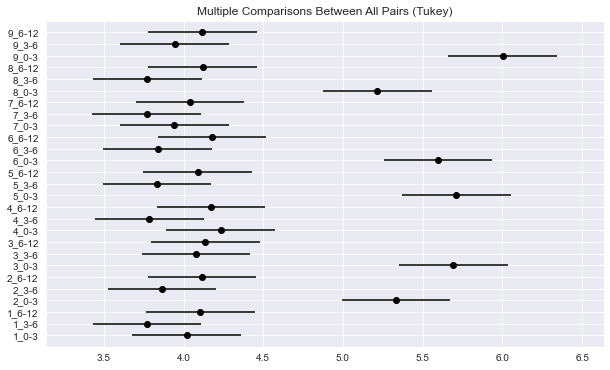

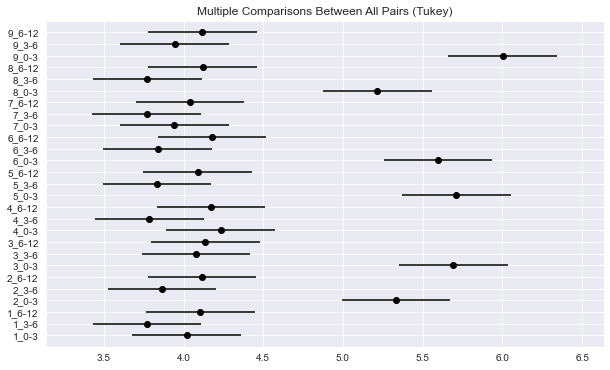

In [17]:
 df["combine"] = df["Trt"].astype(str)+'_' + df["Depth"].astype(str)
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['SW19'],
 groups=df['combine'],
 alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous()

# 3.Dependent Variable WW20

**MULTIPLE Comparision is not possible due to missing DATA**

Post-Hoc Comparisons, Depth 

In [ ]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW20'],
 groups=df['Depth'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary())

**Post-Hoc Comparisons, Treatment**

Multile comparision is not possible due to missing Data

In [ ]:
tukey=sm.stats.multicomp.pairwise_tukeyhsd(endog=df['WW20'],
 groups=df['Trt'],
 alpha=0.05)
tukey.plot_simultaneous()
print(tukey.summary()) 